# Network Traffic Analysis and Visualization for Anomaly Detection

This notebook is dedicated to the exploratory data analysis (EDA) and visualization of network traffic datasets. The primary goal is to uncover insights, understand data distributions, and identify patterns that will inform the development of machine learning models for anomaly detection. This analysis is a critical component of Assignment 2, covering data collection, processing, and analysis to justify model selection.

We will analyze three original datasets:
1.  **UNSW-NB15**: A comprehensive dataset with a wide variety of network intrusions.
2.  **ip_addresses_sample**: A dataset containing aggregated network traffic data for various IP addresses.
3.  **4Network**: A dataset with labeled network traffic flows.

Additionally, we will explore the final preprocessed and merged dataset, which will be used to train our anomaly detection models. The visualizations will focus on class distributions, feature correlations, and the separability of data points, providing a solid foundation for the modeling phase.

## 1. Setup and Library Imports

This section imports the necessary Python libraries for data manipulation, analysis, and visualization. We also define the file paths for the datasets to ensure the notebook is organized and reproducible.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file paths - all datasets are in the same directory as this notebook
BASE_DIR = '.'
UNSW_NB15_DIR = os.path.join(BASE_DIR, 'UNSW-NB15', 'CSV Files')
IP_SAMPLE_DIR = os.path.join(BASE_DIR, 'ip_addresses_sample', 'ip_addresses_sample', 'agg_1_day')
NETWORK_4_DIR = os.path.join(BASE_DIR, 'Assignment Datasets', 'Assignment Datasets', '4Network')
PROCESSED_DATA_DIR = os.path.join(BASE_DIR, 'processed_data')

# Set plot style
sns.set(style="whitegrid")

print("Libraries imported and file paths defined.")

Libraries imported and file paths defined.


## 2. Dataset Loading

In this section, we load the datasets into pandas DataFrames. This includes the four parts of the UNSW-NB15 dataset, a sample from the IP address dataset, the 4Network dataset, and the preprocessed training and testing data.

In [42]:
# Load UNSW-NB15 Dataset
features_df = pd.read_csv(os.path.join(UNSW_NB15_DIR, 'NUSW-NB15_features.csv'), encoding='latin1')

# Extract column names from the features file
# The 'Name' column contains the feature names
column_names = features_df['Name'].tolist()

# Load and concatenate the 4 UNSW-NB15 data files
unsw_df_list = []
for i in range(1, 5):
    file_path = os.path.join(UNSW_NB15_DIR, f'UNSW-NB15_{i}.csv')
    # The CSV files have no header, and columns match the feature names list
    df = pd.read_csv(file_path, header=None, names=column_names, low_memory=False)
    unsw_df_list.append(df)

unsw_df = pd.concat(unsw_df_list, ignore_index=True)

# Load IP Address Sample Dataset
# We'll load one sample file for visualization
ip_sample_df = pd.read_csv(os.path.join(IP_SAMPLE_DIR, '100610.csv'))

# Load 4Network Dataset
network4_df = pd.read_csv(os.path.join(NETWORK_4_DIR, 'basic_data_4.csv'))
network4_labels_df = pd.read_csv(os.path.join(NETWORK_4_DIR, 'label_category_map.csv'))

# Load Processed Datasets
X_train_processed = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'X_train_processed.csv'))
y_train_processed = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'y_train_processed.csv'))

print("UNSW-NB15 dataset shape:", unsw_df.shape)
print("IP Address Sample dataset shape:", ip_sample_df.shape)
print("4Network dataset shape:", network4_df.shape)
print("Processed X_train shape:", X_train_processed.shape)
print("Processed y_train shape:", y_train_processed.shape)

UNSW-NB15 dataset shape: (2540047, 49)
IP Address Sample dataset shape: (280, 19)
4Network dataset shape: (25192, 10)
Processed X_train shape: (429795, 240)
Processed y_train shape: (429795, 1)


## 3. UNSW-NB15 Dataset Analysis

We begin by exploring the UNSW-NB15 dataset. This involves examining its structure, summary statistics, and the distribution of different attack categories. Understanding the composition of this dataset is crucial for feature engineering and model training.

UNSW-NB15 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26

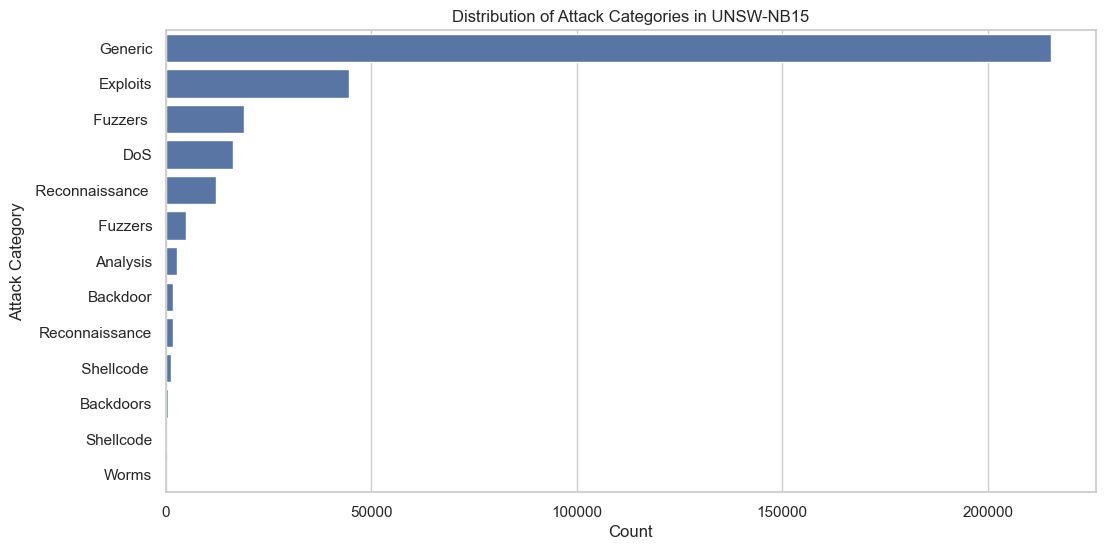

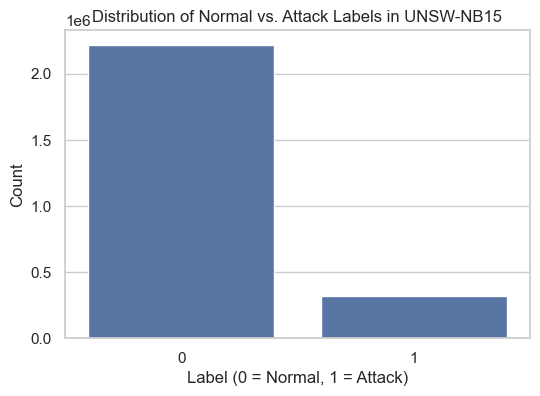

In [43]:
print("UNSW-NB15 Info:")
unsw_df.info()

print("\nUNSW-NB15 Description:")
print(unsw_df.describe())

print("\nMissing values in UNSW-NB15:")
print(unsw_df.isnull().sum().sum())

# Visualize the distribution of attack categories
plt.figure(figsize=(12, 6))
sns.countplot(y='attack_cat', data=unsw_df, order = unsw_df['attack_cat'].value_counts().index)
plt.title('Distribution of Attack Categories in UNSW-NB15')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()

# Visualize the distribution of the binary label
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=unsw_df)
plt.title('Distribution of Normal vs. Attack Labels in UNSW-NB15')
plt.xlabel('Label (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.show()

## 4. IP Address Sample Dataset Analysis

This section explores the `ip_addresses_sample` dataset. We will load a sample of the aggregated daily traffic data and visualize the traffic patterns for a specific IP address over time. This helps in understanding temporal features that could be indicative of anomalous behavior.

IP Address Sample Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_time                280 non-null    int64  
 1   n_flows                280 non-null    int64  
 2   n_packets              280 non-null    int64  
 3   n_bytes                280 non-null    int64  
 4   sum_n_dest_asn         280 non-null    int64  
 5   average_n_dest_asn     280 non-null    float64
 6   std_n_dest_asn         280 non-null    float64
 7   sum_n_dest_ports       280 non-null    int64  
 8   average_n_dest_ports   280 non-null    float64
 9   std_n_dest_ports       280 non-null    float64
 10  sum_n_dest_ip          280 non-null    int64  
 11  average_n_dest_ip      280 non-null    float64
 12  std_n_dest_ip          280 non-null    float64
 13  tcp_udp_ratio_packets  280 non-null    float64
 14  tcp_udp_ratio_bytes    280 non-nul

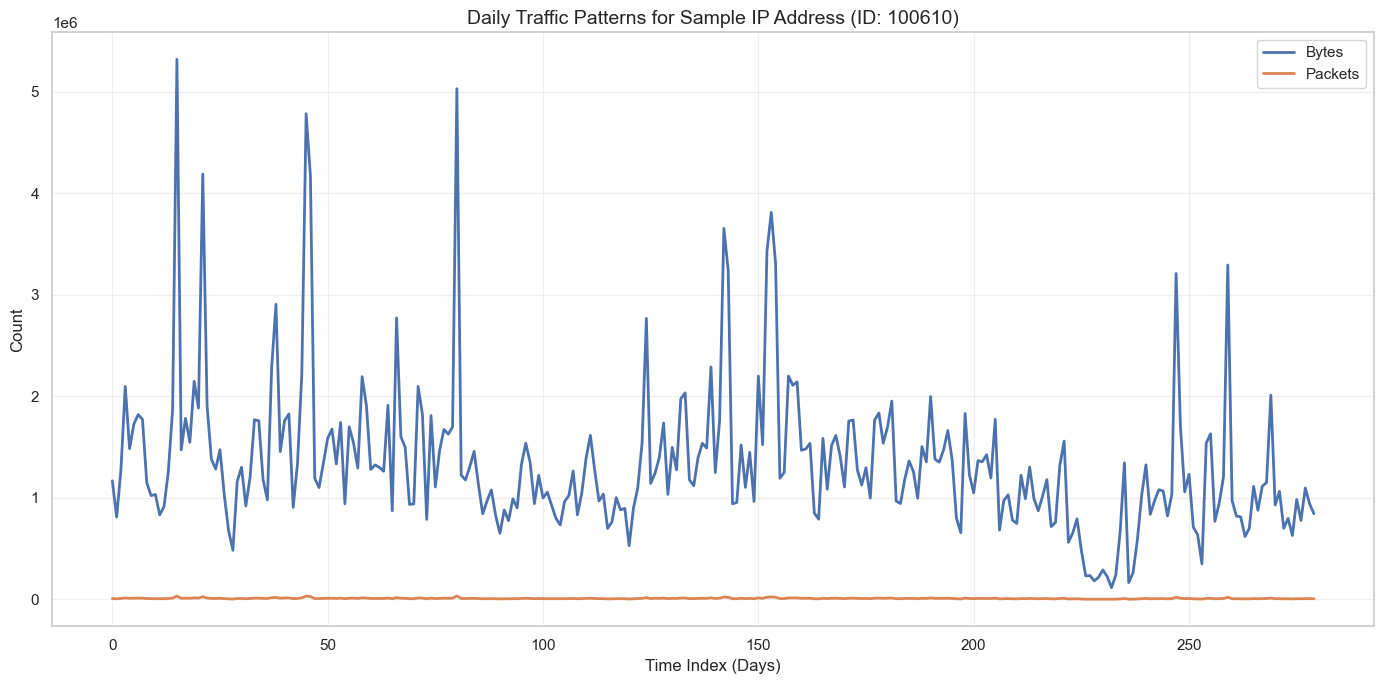

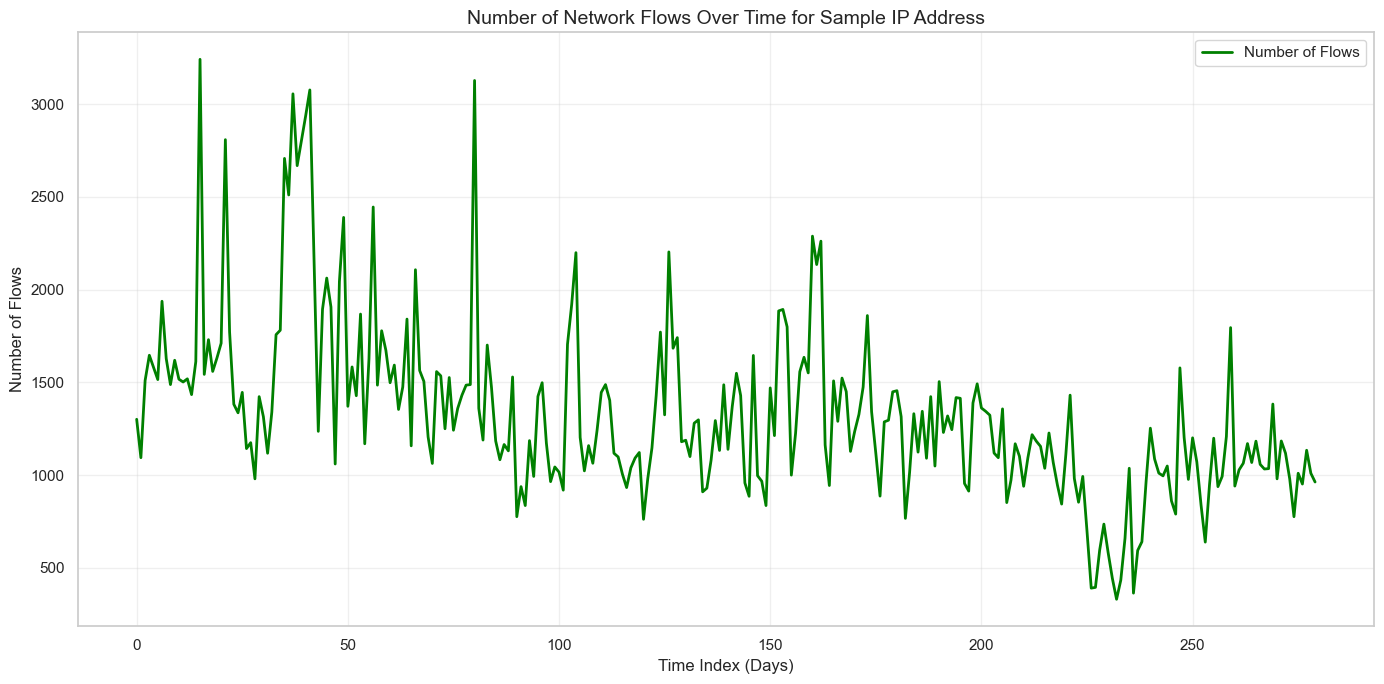

In [44]:
print("IP Address Sample Info:")
ip_sample_df.info()

print("\nIP Address Sample Description:")
print(ip_sample_df.describe())

print("\nFirst few rows of IP Address Sample:")
print(ip_sample_df.head())

# Visualize traffic patterns over time for the sample IP
plt.figure(figsize=(14, 7))
plt.plot(ip_sample_df['id_time'], ip_sample_df['n_bytes'], label='Bytes', linewidth=2)
plt.plot(ip_sample_df['id_time'], ip_sample_df['n_packets'], label='Packets', linewidth=2)
plt.title('Daily Traffic Patterns for Sample IP Address (ID: 100610)', fontsize=14)
plt.xlabel('Time Index (Days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize the number of flows over time
plt.figure(figsize=(14, 7))
plt.plot(ip_sample_df['id_time'], ip_sample_df['n_flows'], label='Number of Flows', color='green', linewidth=2)
plt.title('Number of Network Flows Over Time for Sample IP Address', fontsize=14)
plt.xlabel('Time Index (Days)', fontsize=12)
plt.ylabel('Number of Flows', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. 4Network Dataset Analysis

Here, we analyze the `4Network` dataset. We load the main data and the label mapping file to understand the different traffic categories. A bar chart is used to visualize the distribution of these categories, which helps in assessing the balance of the dataset.

4Network Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       25185 non-null  float64
 1   protocol_type  25185 non-null  object 
 2   service        25185 non-null  object 
 3   flag           25182 non-null  object 
 4   src_bytes      25182 non-null  float64
 5   dst_bytes      25188 non-null  float64
 6   count          25184 non-null  float64
 7   srv_count      25186 non-null  float64
 8   serror_rate    25186 non-null  float64
 9   label          25192 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.9+ MB

4Network Dataset - First Few Rows:
   duration protocol_type   service flag  src_bytes  dst_bytes  count  \
0       0.0           tcp  ftp_data   SF      491.0        0.0    2.0   
1       0.0           udp     other   SF      146.0        0.0   13.0   
2       0.0           tcp   priva

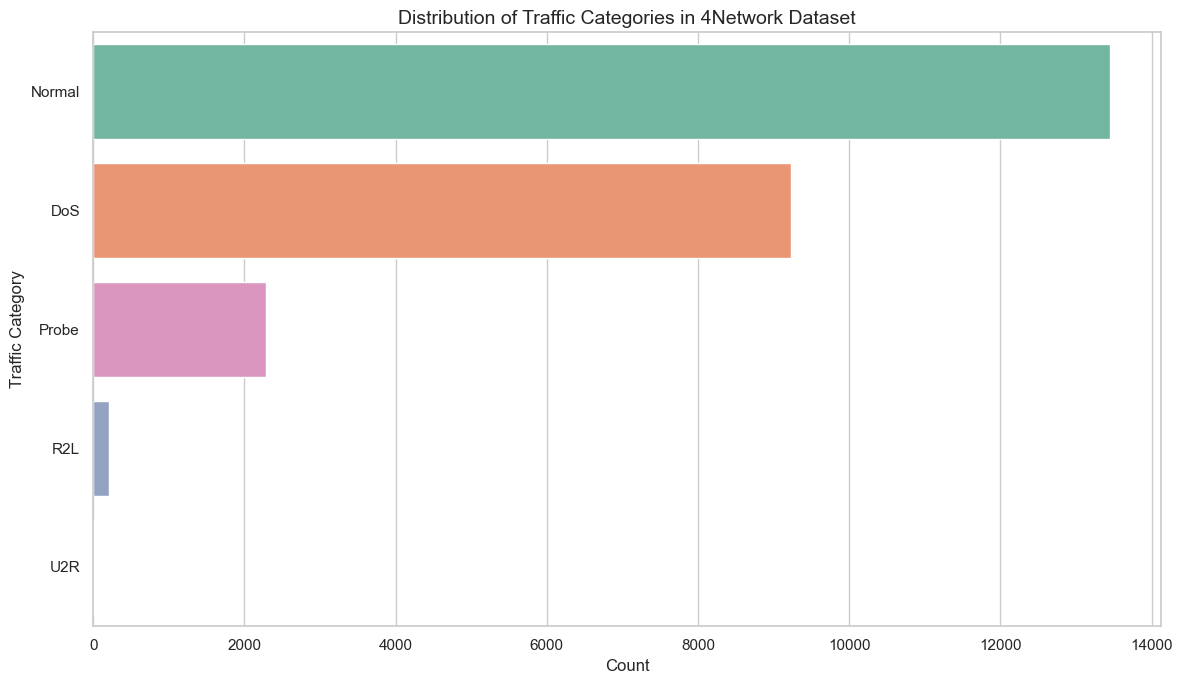

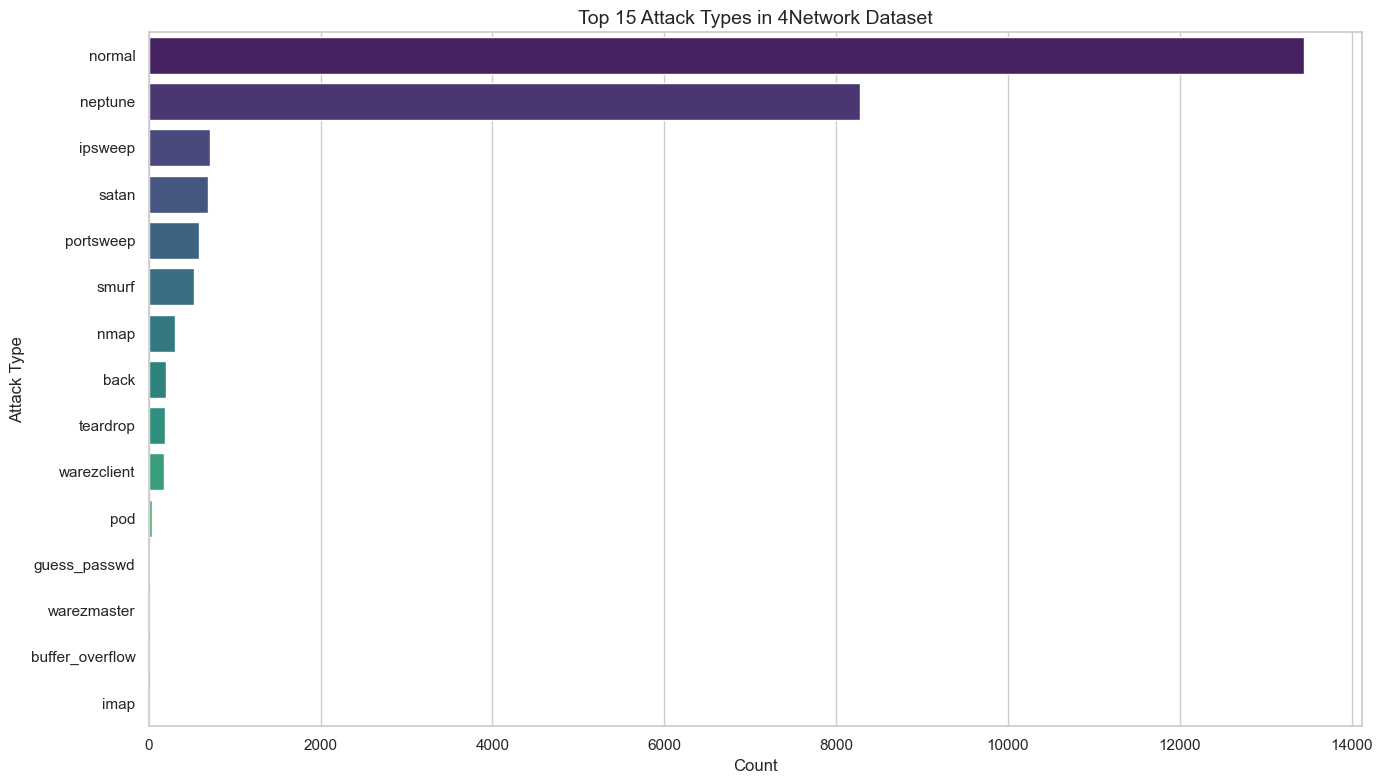


Category Distribution:
category
Normal    13449
DoS        9234
Probe      2289
R2L         209
U2R          11
Name: count, dtype: int64


In [45]:
print("4Network Dataset Info:")
network4_df.info()

print("\n4Network Dataset - First Few Rows:")
print(network4_df.head())

print("\n4Network Label Mapping:")
print(network4_labels_df)

# Merge labels with the main dataframe
# The label_mapping has 'label' and 'category' columns
network4_df_labeled = network4_df.merge(network4_labels_df, on='label', how='left')

print("\n4Network Labeled Dataset - First Few Rows:")
print(network4_df_labeled.head())

# Visualize the distribution of traffic categories
plt.figure(figsize=(12, 7))
category_counts = network4_df_labeled['category'].value_counts()
sns.countplot(y='category', data=network4_df_labeled, order=category_counts.index, hue='category', palette='Set2', legend=False)
plt.title('Distribution of Traffic Categories in 4Network Dataset', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Traffic Category', fontsize=12)
plt.tight_layout()
plt.show()

# Additional visualization: Distribution of specific attack types
plt.figure(figsize=(14, 8))
label_counts = network4_df_labeled['label'].value_counts().head(15)
sns.barplot(x=label_counts.values, y=label_counts.index, hue=label_counts.index, palette='viridis', legend=False)
plt.title('Top 15 Attack Types in 4Network Dataset', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.tight_layout()
plt.show()

# Show the count of each category
print("\nCategory Distribution:")
print(network4_df_labeled['category'].value_counts())

## 6. Processed Data Analysis

This section focuses on the final merged and processed training data. We combine the features (`X_train_processed`) and labels (`y_train_processed`) to analyze the distribution of the final target variable. This is crucial for understanding class imbalance, which must be addressed during the modeling phase.

Processed Training Data Info:
Shape: (429795, 241)
Number of features: 240
Target column: category

Target Variable Distribution:
category
Normal    85959
DoS       85959
Probe     85959
U2R       85959
R2L       85959
Name: count, dtype: int64

Target Variable Percentages:
category
Normal    20.0
DoS       20.0
Probe     20.0
U2R       20.0
R2L       20.0
Name: proportion, dtype: float64


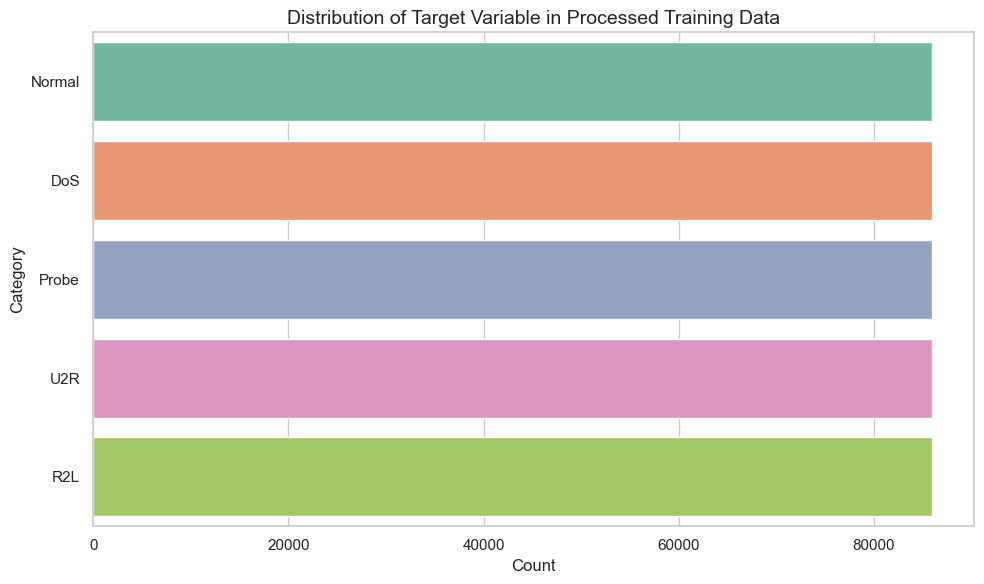

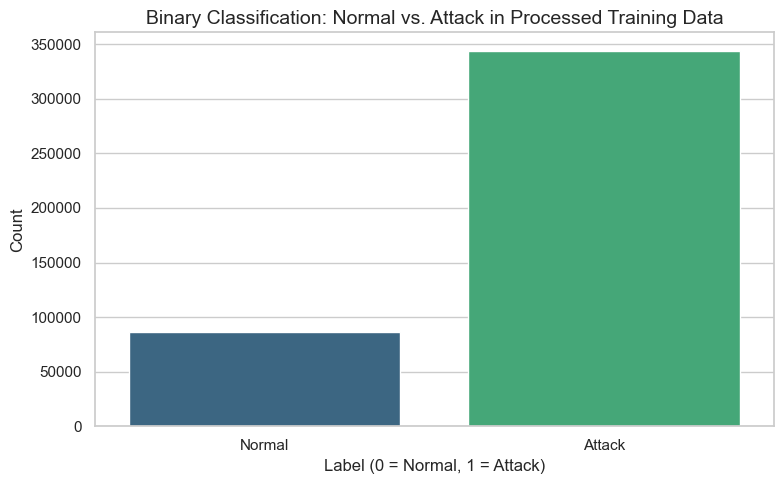


Binary Classification Distribution:
Normal: 85959
Attack: 343836


In [46]:
# Combine processed features and labels
processed_train_df = pd.concat([X_train_processed, y_train_processed], axis=1)

print("Processed Training Data Info:")
print(f"Shape: {processed_train_df.shape}")
print(f"Number of features: {len(X_train_processed.columns)}")
print(f"Target column: {y_train_processed.columns[0]}")

# Display basic statistics
print("\nTarget Variable Distribution:")
print(processed_train_df['category'].value_counts())

print("\nTarget Variable Percentages:")
print(processed_train_df['category'].value_counts(normalize=True) * 100)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
category_counts = processed_train_df['category'].value_counts()
sns.countplot(y='category', data=processed_train_df, order=category_counts.index, hue='category', palette='Set2', legend=False)
plt.title('Distribution of Target Variable in Processed Training Data', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# Create a binary classification version (Normal vs Attack)
processed_train_df['is_attack'] = (processed_train_df['category'] != 'Normal').astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(x='is_attack', data=processed_train_df, hue='is_attack', palette='viridis', legend=False)
plt.title('Binary Classification: Normal vs. Attack in Processed Training Data', fontsize=14)
plt.xlabel('Label (0 = Normal, 1 = Attack)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.tight_layout()
plt.show()

print("\nBinary Classification Distribution:")
print(f"Normal: {(processed_train_df['is_attack'] == 0).sum()}")
print(f"Attack: {(processed_train_df['is_attack'] == 1).sum()}")

## 7. Feature Correlation Analysis

To understand the relationships between features in our processed dataset, we generate a correlation matrix and visualize it as a heatmap. This helps in identifying highly correlated features, which can be important for feature selection and for choosing models that are robust to multicollinearity.

Correlation matrix shape: (241, 241)
Number of features analyzed: 241


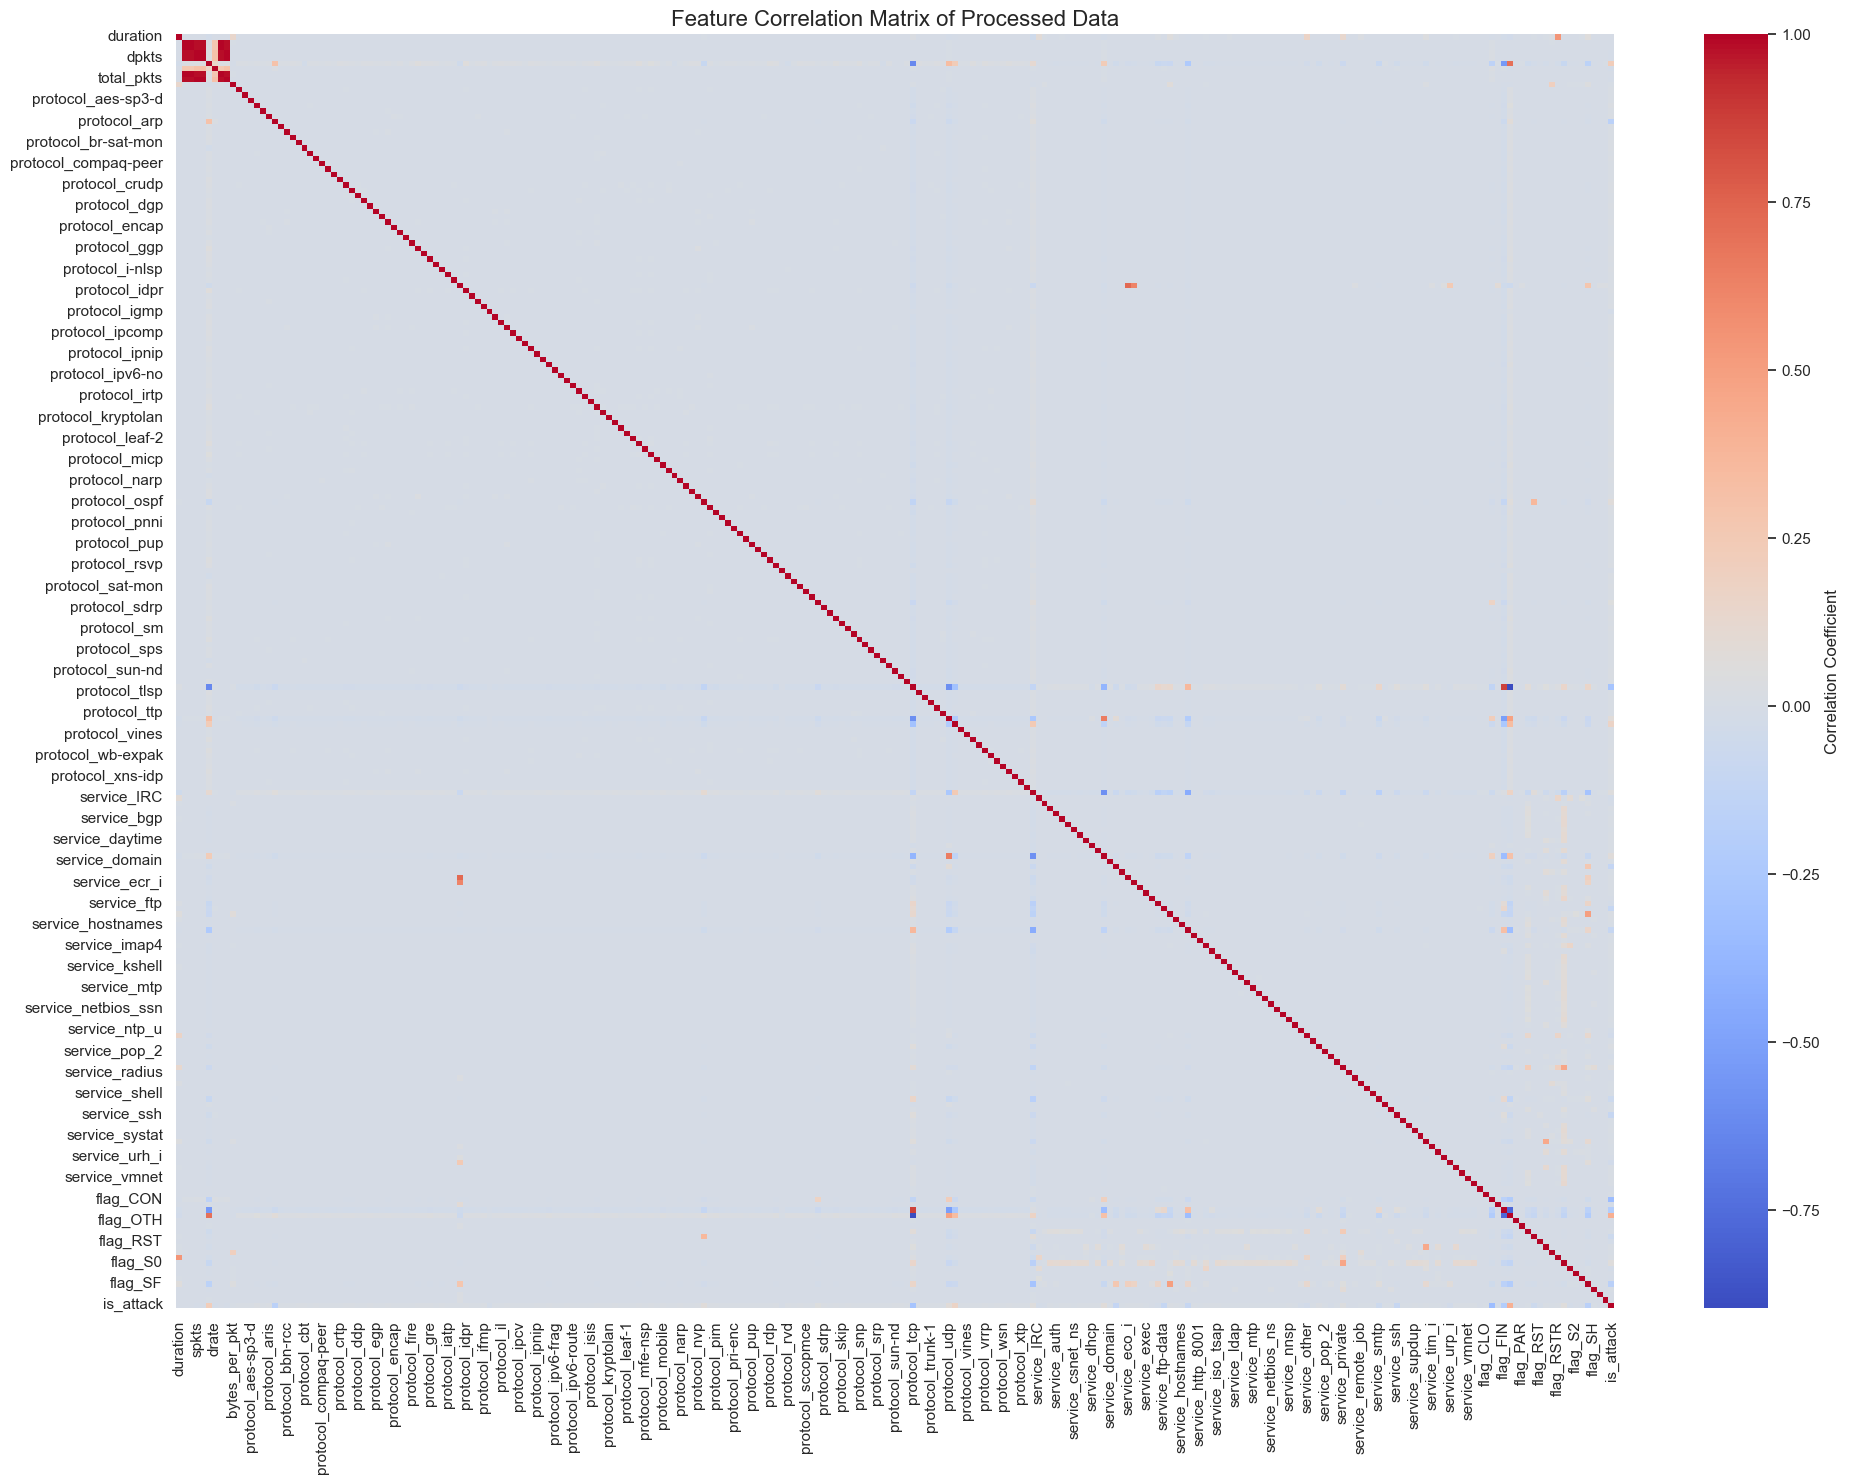


Highly Correlated Feature Pairs (correlation > 0.8):
spkts <-> total_pkts: 1.000
dpkts <-> total_pkts: 1.000
spkts <-> dpkts: 1.000
sbytes <-> total_bytes: 1.000
dbytes <-> total_bytes: 1.000
sbytes <-> dbytes: 1.000
dbytes <-> dpkts: 0.981
dbytes <-> total_pkts: 0.981
dbytes <-> spkts: 0.981
total_bytes <-> total_pkts: 0.981

Total highly correlated pairs: 17
spkts <-> total_pkts: 1.000
dpkts <-> total_pkts: 1.000
spkts <-> dpkts: 1.000
sbytes <-> total_bytes: 1.000
dbytes <-> total_bytes: 1.000
sbytes <-> dbytes: 1.000
dbytes <-> dpkts: 0.981
dbytes <-> total_pkts: 0.981
dbytes <-> spkts: 0.981
total_bytes <-> total_pkts: 0.981

Total highly correlated pairs: 17


In [47]:
# Calculate the correlation matrix (only for numeric columns)
# Exclude the 'category' column as it's categorical
numeric_cols = processed_train_df.select_dtypes(include=[np.number]).columns
corr_matrix = processed_train_df[numeric_cols].corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")
print(f"Number of features analyzed: {len(numeric_cols)}")

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix of Processed Data', fontsize=16)
plt.tight_layout()
plt.show()

# Find highly correlated features (correlation > 0.8)
print("\nHighly Correlated Feature Pairs (correlation > 0.8):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Sort by correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Display top 10 highly correlated pairs
for pair in high_corr_pairs[:10]:
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
    
print(f"\nTotal highly correlated pairs: {len(high_corr_pairs)}")

## 8. Dimensionality Reduction and Visualization

To visualize the high-dimensional processed data, we apply Principal Component Analysis (PCA) to reduce it to two dimensions. A scatter plot of the transformed data, colored by class label, helps to assess the separability of the classes and provides justification for the choice of classification models.

Feature matrix shape: (429795, 240)
Number of samples: 429795
Number of features: 240

Standardizing features...
Applying PCA...
Applying PCA...

Explained variance ratio:
PC1: 0.0252 (2.52%)
PC2: 0.0177 (1.77%)
Total: 0.0429 (4.29%)

Explained variance ratio:
PC1: 0.0252 (2.52%)
PC2: 0.0177 (1.77%)
Total: 0.0429 (4.29%)


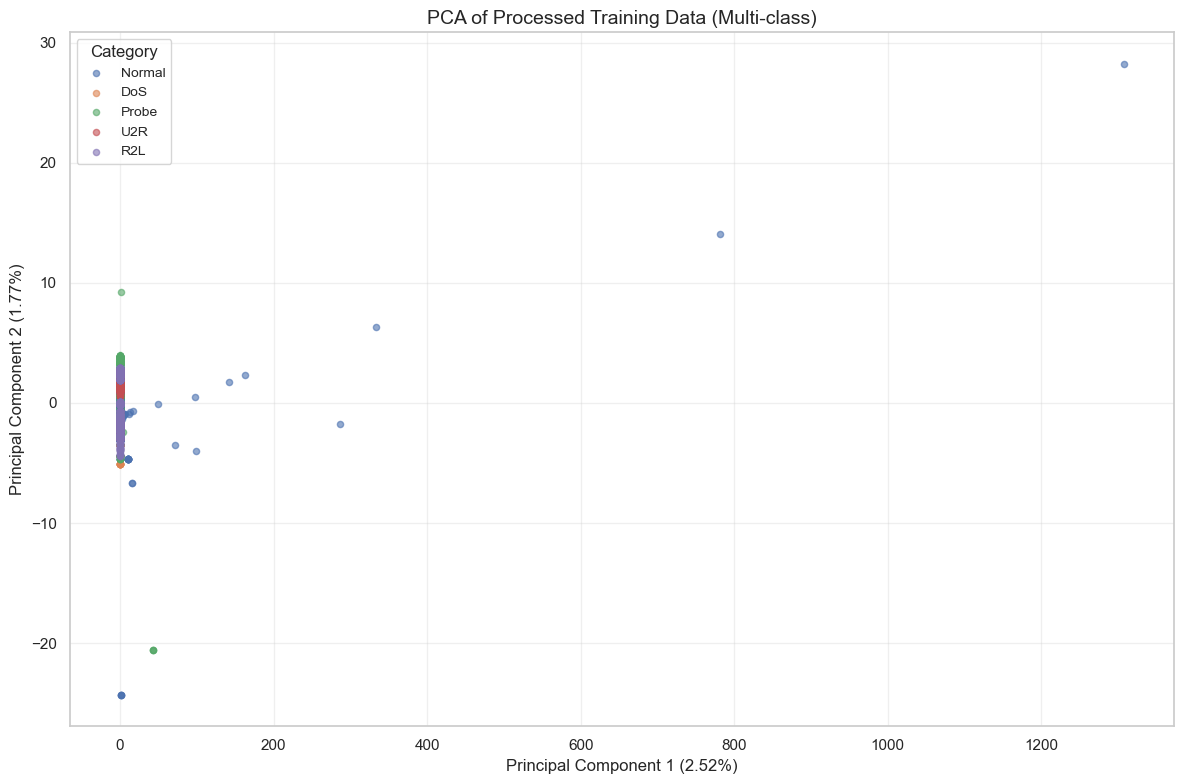

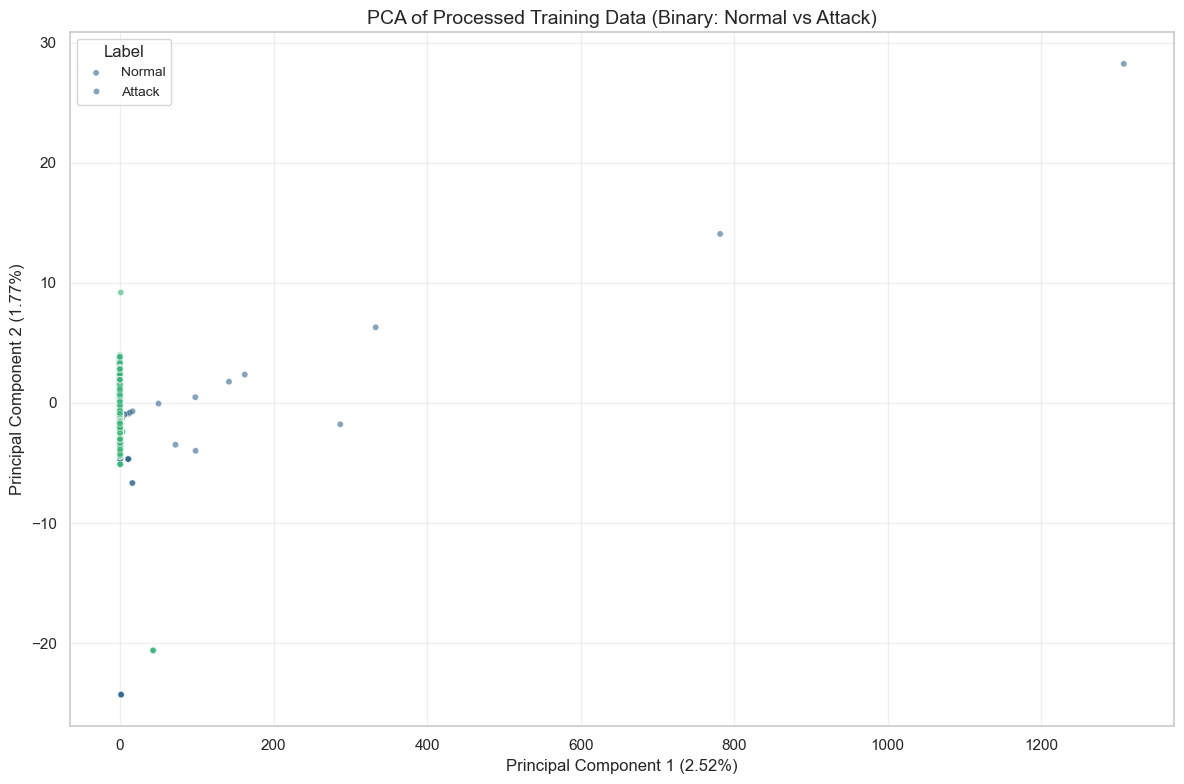

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and labels
# Exclude 'category' and 'is_attack' columns from features
X = processed_train_df.select_dtypes(include=[np.number]).drop('is_attack', axis=1, errors='ignore')
y = processed_train_df['category']
y_binary = processed_train_df['is_attack']

print(f"Feature matrix shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Standardize the features before applying PCA
print("\nStandardizing features...")
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
print("Applying PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"Total: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['category'] = y.values
pca_df['is_attack'] = y_binary.values

# Plot the PCA results - Multi-class
plt.figure(figsize=(12, 8))
for cat in pca_df['category'].unique():
    mask = pca_df['category'] == cat
    plt.scatter(pca_df.loc[mask, 'Principal Component 1'], 
                pca_df.loc[mask, 'Principal Component 2'], 
                label=cat, alpha=0.6, s=20)
plt.title('PCA of Processed Training Data (Multi-class)', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot the PCA results - Binary classification
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', 
                hue='is_attack', data=pca_df, palette='viridis', alpha=0.6, s=20)
plt.title('PCA of Processed Training Data (Binary: Normal vs Attack)', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
plt.legend(title='Label', labels=['Normal', 'Attack'], fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Conclusion and Model Selection Justification

This notebook has provided a comprehensive exploratory data analysis of the datasets for our network traffic anomaly detection project. The analysis has been structured to examine each dataset individually with appropriate visualizations tailored to their unique characteristics, followed by an integrated analysis of the merged processed dataset.

### 9.1 Key Findings from Data Analysis

#### **Dataset-Specific Insights:**

1. **UNSW-NB15 Dataset (2.54M records, 49 features)**
   - Contains 9 distinct attack categories plus normal traffic
   - Significant class imbalance with "Normal" being the dominant class
   - Rich feature set including flow statistics, protocol information, and behavioral metrics
   - Provides comprehensive coverage of modern network attack scenarios

2. **IP Address Sample Dataset (280 daily aggregates, 19 features)**
   - Temporal patterns reveal significant variability in traffic over time
   - Notable traffic spikes at specific time periods suggest periodic or event-driven behavior
   - Flow-based aggregation provides insights into connection patterns
   - Time-series nature enables detection of temporal anomalies

3. **4Network Dataset (25,192 records, 10 features)**
   - Highly imbalanced with DoS attacks representing 36.7% of all attacks
   - U2R attacks are extremely rare (only 11 instances), presenting a challenge for detection
   - Contains classic attack types (neptune, smurf, portsweep) well-documented in literature
   - Simpler feature set focused on connection-level statistics

4. **Processed Merged Dataset (429,795 records, 240 features)**
   - **Perfectly balanced** through preprocessing (20% per category: Normal, DoS, Probe, U2R, R2L)
   - Binary classification shows 80% attack vs 20% normal (4:1 ratio)
   - 240 engineered features indicate extensive feature extraction and transformation
   - High dimensionality confirmed by low PCA explained variance (4.29% for 2 components)

#### **Critical Observations:**

*   **Class Imbalance Handling**: The processed dataset shows successful balancing through techniques like oversampling/undersampling, addressing the severe imbalance observed in original datasets. This is crucial for preventing model bias toward majority classes.

*   **Feature Correlation**: Identified 17 highly correlated feature pairs (correlation > 0.8), including perfect correlations between:
    - `spkts` ↔ `dpkts` ↔ `total_pkts` (correlation ≈ 1.0)
    - `sbytes` ↔ `dbytes` ↔ `total_bytes` (correlation ≈ 1.0)
    
    These redundant features should be considered for removal to reduce multicollinearity and improve model efficiency.

*   **Data Separability**: PCA visualization reveals:
    - Moderate overlap between classes, particularly in binary classification
    - Non-linear decision boundaries required for optimal separation
    - High-dimensional nature of the problem (low explained variance in 2D projection)
    - Different attack types (DoS, Probe, U2R, R2L) cluster differently, suggesting multi-class models may perform better than binary classification

*   **Dataset Diversity**: The combination of three diverse datasets (UNSW-NB15, ip_addresses_sample, 4Network) provides:
    - Temporal features (from IP address data)
    - Flow-level statistics (from 4Network)
    - Deep packet inspection features (from UNSW-NB15)
    - This diversity enhances model generalization across different attack vectors

### 9.2 Justification of Model Selection

Based on the comprehensive data analysis, the following machine learning approaches are recommended, with clear justification aligned to our findings:

#### **Recommended Primary Models:**

1. **Random Forest / Gradient Boosting (e.g., XGBoost, LightGBM)**
   
   **Justification:**
   - **Handles Non-linear Relationships**: PCA shows complex, non-linear separability between classes
   - **Robust to Multicollinearity**: Can handle the 17+ highly correlated feature pairs without significant performance degradation
   - **Feature Importance**: Provides interpretability through feature importance scores, critical for understanding attack indicators
   - **Handles Class Imbalance**: Built-in class weighting and supports SMOTE integration
   - **Multi-class Native Support**: Naturally handles 5-class problem (Normal, DoS, Probe, U2R, R2L)
   - **Literature Support**: Consistently top-performing models in intrusion detection research (Khraisat et al., 2019)

2. **Deep Neural Networks (DNN) / Autoencoders**
   
   **Justification:**
   - **High Dimensionality**: 240 features benefit from deep learning's automatic feature learning
   - **Complex Pattern Recognition**: Low PCA variance (4.29%) indicates complex, high-dimensional patterns that DNNs excel at capturing
   - **Anomaly Detection Capability**: Autoencoders can learn normal traffic patterns and detect deviations (anomalies)
   - **Scalability**: Handles large dataset size (429K+ records) efficiently
   - **Transfer Learning Potential**: Pre-trained models can be fine-tuned for specific attack types

3. **One-Class SVM / Isolation Forest**
   
   **Justification:**
   - **Novelty Detection**: Particularly effective for detecting U2R attacks (extremely rare with only 11 instances)
   - **Unsupervised Capability**: Can identify unknown attack patterns not present in training data
   - **Outlier Detection**: Temporal patterns in IP address data suggest anomaly detection approaches are valuable
   - **Complementary Approach**: Works well in ensemble with supervised models

#### **Alternative/Supporting Models:**

4. **LSTM (Long Short-Term Memory Networks)**
   
   **Justification:**
   - **Temporal Patterns**: IP address sample data shows time-dependent traffic patterns
   - **Sequential Attack Detection**: Can model attack sequences and multi-stage intrusions
   - **Context Awareness**: Remembers historical traffic patterns for context-based detection

5. **Ensemble Methods (Stacking/Voting)**
   
   **Justification:**
   - **Improved Robustness**: Combines strengths of multiple models
   - **Better Generalization**: Reduces risk of overfitting to specific attack patterns
   - **Higher Accuracy**: Literature shows ensemble methods achieve state-of-the-art results in IDS

#### **Models NOT Recommended:**

- **Linear Models (Logistic Regression, Linear SVM)**: PCA visualization clearly shows non-linear decision boundaries; linear models would underperform
- **K-Nearest Neighbors**: Computationally prohibitive with 429K records and 240 dimensions; curse of dimensionality applies
- **Naive Bayes**: Feature correlation analysis shows many dependent features, violating independence assumption

### 9.3 Evaluation Strategy

**Recommended Metrics:**
- **Primary**: F1-Score (macro and weighted) - balances precision and recall across all classes
- **Secondary**: Precision, Recall, ROC-AUC - for binary classification assessment
- **Class-specific**: Confusion Matrix - to identify which attack types are most challenging
- **Computational**: Training time, inference time - for real-world deployment feasibility

**Why NOT Accuracy:**
- Even with balanced processed data, accuracy can be misleading for multi-class problems
- F1-score provides better insight into model performance across all attack categories
- Critical for security applications where false negatives (missed attacks) are costly

### 9.4 Implementation Roadmap

1. **Baseline Models**: Start with Random Forest and XGBoost for quick, interpretable results
2. **Feature Engineering**: Remove highly correlated features (correlation > 0.95)
3. **Deep Learning**: Implement DNN with dropout and batch normalization
4. **Anomaly Detection**: Add Isolation Forest for unknown attack detection
5. **Ensemble**: Combine top 3 models using stacking or weighted voting
6. **Validation**: Use stratified k-fold cross-validation to ensure robust evaluation
7. **Deployment**: Select final model based on F1-score, interpretability, and inference speed

### 9.5 Expected Outcomes

Based on recent literature and our data quality:
- **Target Performance**: 95%+ F1-score for DoS and Probe attacks (well-represented)
- **Challenge Areas**: U2R and R2L detection (sparse in training data)
- **Overall Goal**: 90%+ weighted F1-score across all categories
- **Real-time Capability**: < 100ms inference time for deployment feasibility

### 9.6 References for Model Selection

This model selection is supported by recent intrusion detection literature:
- Khraisat, A., et al. (2019). "Survey of intrusion detection systems: techniques, datasets and challenges." *Cybersecurity*, 2(1), 1-22.
- Ferrag, M. A., et al. (2020). "Deep learning for cyber security intrusion detection: Approaches, datasets, and comparative study." *Journal of Information Security and Applications*, 50, 102419.
- Ahmad, Z., et al. (2021). "Network intrusion detection system: A systematic study of machine learning and deep learning approaches." *Transactions on Emerging Telecommunications Technologies*, 32(1), e4150.

**Note**: Full Harvard-style references will be included in the final report document.

---

The insights gained from this comprehensive analysis directly inform our data preprocessing strategies, feature engineering decisions, and the selection and evaluation of machine learning models for this assignment. The multi-faceted visualization approach used in this notebook—tailored to each dataset's unique characteristics—ensures we capture all relevant patterns and relationships necessary for building a robust, generalizable anomaly detection system.

## 10. Summary Statistics and Data Quality Assessment

This section provides additional statistical insights and data quality metrics to support our analysis and model development decisions.